C:\Users\robot\AppData\Local\Temp\ipykernel_19808\2476100844.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Start'] = pd.to_datetime(data['Start'])
C:\Users\robot\AppData\Local\Temp\ipykernel_19808\2476100844.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['End'] = pd.to_datetime(data['End'])


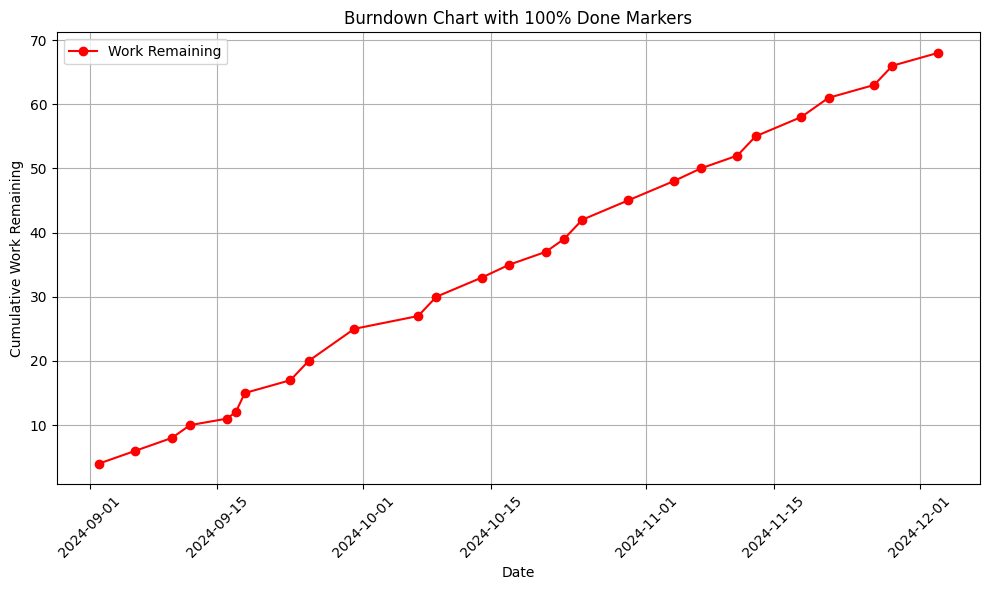

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the Excel data (update with your file path)
file_path = 'datasets/burndown.xlsx'
data = pd.read_excel(file_path)

# Step 2: Convert 'Start' and 'End' columns to datetime format
data['Start'] = pd.to_datetime(data['Start'])
data['End'] = pd.to_datetime(data['End'])

# Step 3: Clean and convert the '% Done' column to float, stripping '%' if necessary
data['% Done'] = pd.to_numeric(data['% Done'], errors='coerce')  # Ensure it's numeric

# Step 4: Calculate cumulative remaining work
data['Cumulative Remaining'] = data['Days'].cumsum()

# Step 5: Filter the rows where '% Done' is 100%
done_data = data[data['% Done'] == 100]

# Step 6: Create the burndown chart
plt.figure(figsize=(10, 6))

# Plot cumulative remaining work for all tasks
plt.plot(data['Start'], data['Cumulative Remaining'], label='Work Remaining', color='red', marker='o')

# Highlight only tasks that are 100% done
if not done_data.empty:
    plt.scatter(done_data['Start'], done_data['Cumulative Remaining'], label='100% Done', color='green', marker='x')

# Add chart title and labels
plt.title('Burndown Chart with 100% Done Markers')
plt.xlabel('Date')
plt.ylabel('Cumulative Work Remaining')
plt.legend()

# Show grid and rotate x-axis dates for clarity
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Step 7: Display the plot
plt.show()
